### Examen final:
1. Hacer la separacion de los datos X, y en dos conjuntos:  entrenamiento y ensayo o sea x_train, x_test y y_train, y_test
2. Normalizar los datos con el StandardScaler
3. Entrenar un algoritmo de Arboles aleatorios (RandomForest)
4. Evaluar la precision del algoritmo con accuracy_score y con confusion_matrix
5. Evaluar la importancia de variables y hacer la grafica
6. Crear un nuevo modelo utilizando solamenta los 4 atributos mas importantes y salvar el modelo en un archivo tipo joblib

Nota:  Para hacer este ejercicio hay que basarse en el cuaderno 13a-SKLEARN

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
#Importando el drive al colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Importando el dataset de la carpeta del drive
!ls '/content/gdrive/My Drive/Colab Notebooks'

 14-Aprobacion-tarjeta-credito-Tarea.ipynb
 cell_samples.csv
'Copia de 01-introduccion-a-python.ipynb'
'Copia de 02-objetos-en-python.ipynb'
'Copia de 03a-tuplas.ipynb'
'Copia de 03b-listas.ipynb'
'Copia de 03c-diccionarios.ipynb'
'Copia de 04-libreria-pandas (1).ipynb'
'Copia de 04-libreria-pandas.ipynb'
'Copia de 05-Numpy.ipynb'
'Copia de 06-Matplotlib.ipynb'
'Copia de 07-Instrucciones-de-control-de-flujo.ipynb'
'Copia de 10-keras-cell-clasifier.ipynb'
'Copia de 11-keras-mnist (1).ipynb'
'Copia de 11-keras-mnist (2).ipynb'
'Copia de 11-keras-mnist.ipynb'
'Copia de 13a-SKLEARN (1).ipynb'
'Copia de 13a-SKLEARN.ipynb'
'Copia de 8b-regresion-lineal.ipynb'
'Copia de 8-regresion-lineal.ipynb'
'Copia de 8-regresion-lineal-simple_Primera.ipynb'
'Copia de 8-regresion-lineal-simple_Segunda.ipynb'
'Copia de 9a-prueba-funcion-sigmoide.ipynb'
'Copia de 9b-red-neuronal.ipynb'
 credit-approval1.csv
 credit-approval-.csv
'Examen 1'
'Examen Final - Claudia Valencia Morales.ipynb'
 precios-apartamento

In [4]:
#Lectura de los datos 
credit = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/credit-approval1.csv') 
credit.head(10)

,Genero,Edad,Deuda,Casado,ClienteBanco,NivelEstudios,GrupoPobl,TiempoEmpleado,IncumplimientosPrevios,Empleado,PuntajeCredito,LicenciaConduccion,Ciudadania,CodigoZip,Ingresos,Aprobado
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+


In [5]:
#get summary of numeric columns
credit.describe()

,Edad,Deuda,TiempoEmpleado,PuntajeCredito,CodigoZip,Ingresos
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [6]:
#replace missing values with mean values of numeric columns
credit.fillna(credit.mean(), inplace=True)

In [7]:
credit.dtypes

Genero                     object
Edad                      float64
Deuda                     float64
Casado                     object
ClienteBanco               object
NivelEstudios              object
GrupoPobl                  object
TiempoEmpleado            float64
IncumplimientosPrevios     object
Empleado                   object
PuntajeCredito              int64
LicenciaConduccion         object
Ciudadania                 object
CodigoZip                 float64
Ingresos                    int64
Aprobado                   object
dtype: object

In [8]:
# quitamos la columna CodigoZip
credit_drop=credit.drop(["CodigoZip","GrupoPobl"],axis=1)

In [9]:
credit_drop['Aprobado']

0      +
1      +
2      +
3      +
4      +
      ..
685    -
686    -
687    -
688    -
689    -
Name: Aprobado, Length: 690, dtype: object

In [10]:
credit_drop.dtypes

Genero                     object
Edad                      float64
Deuda                     float64
Casado                     object
ClienteBanco               object
NivelEstudios              object
TiempoEmpleado            float64
IncumplimientosPrevios     object
Empleado                   object
PuntajeCredito              int64
LicenciaConduccion         object
Ciudadania                 object
Ingresos                    int64
Aprobado                   object
dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

#convertimos valores no numericos en numericos 
for col in credit_drop:
    if credit_drop[col].dtypes=='object':
        credit_drop[col]=LE.fit_transform(credit_drop[col])

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# LE = LabelEncoder()

# #convertimos valores no numericos en numericos 
# for col in credit_drop:
#     if credit_drop[col].dtypes=='object':
#         #credit_drop[col]=LE.fit_transform(credit_drop[col])
#         credit_drop[col]= credit_drop.apply(lambda i: LE.fit_transform(credit_drop[col].astype(str)), axis=0) #result_type='expand')

In [12]:
credit_drop.head(10)

,Genero,Edad,Deuda,Casado,ClienteBanco,NivelEstudios,TiempoEmpleado,IncumplimientosPrevios,Empleado,PuntajeCredito,LicenciaConduccion,Ciudadania,Ingresos,Aprobado
0,1,30.83,0.000,1,0,12,1.250,1,1,1,0,0,0,0
1,0,58.67,4.460,1,0,10,3.040,1,1,6,0,0,560,0
2,0,24.50,0.500,1,0,10,1.500,1,0,0,0,0,824,0
3,1,27.83,1.540,1,0,12,3.750,1,1,5,1,0,3,0
4,1,20.17,5.625,1,0,12,1.710,1,0,0,0,2,0,0
5,1,32.08,4.000,1,0,9,2.500,1,0,0,1,0,0,0
6,1,33.17,1.040,1,0,11,6.500,1,0,0,1,0,31285,0
7,0,22.92,11.585,1,0,2,0.040,1,0,0,0,0,1349,0
8,1,54.42,0.500,2,2,8,3.960,1,0,0,0,0,314,0
9,1,42.50,4.915,2,2,12,3.165,1,0,0,1,0,1442,0


In [13]:
credit_drop.describe()

,Genero,Edad,Deuda,Casado,ClienteBanco,NivelEstudios,TiempoEmpleado,IncumplimientosPrevios,Empleado,PuntajeCredito,LicenciaConduccion,Ciudadania,Ingresos,Aprobado
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.713043,31.568171,4.758725,1.250725,0.501449,5.868116,2.223406,0.523188,0.427536,2.40000,0.457971,0.176812,1017.385507,0.555072
std,0.489635,11.853273,4.978163,0.459735,0.880772,4.353235,3.346513,0.499824,0.495080,4.86294,0.498592,0.557869,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,0.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,28.625000,2.750000,1.000000,0.000000,6.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,5.000000,1.000000
75%,1.000000,37.707500,7.207500,1.000000,0.000000,10.000000,2.625000,1.000000,1.000000,3.00000,1.000000,0.000000,395.500000,1.000000
max,2.000000,80.250000,28.000000,3.000000,3.000000,14.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2.000000,100000.000000,1.000000


In [14]:
#veamos ahora los posibles valores de la columna Approved
credit_drop["Aprobado"].unique()

array([0, 1])

In [15]:
X =  credit_drop.iloc[:,credit_drop.columns != 'Aprobado'] # Elegimos la variable X del problema
y =  credit_drop["Aprobado"] #elegimos la variable y del problema

In [16]:
varibles = X
varibles

,Genero,Edad,Deuda,Casado,ClienteBanco,NivelEstudios,TiempoEmpleado,IncumplimientosPrevios,Empleado,PuntajeCredito,LicenciaConduccion,Ciudadania,Ingresos
0,1,30.83,0.000,1,0,12,1.25,1,1,1,0,0,0
1,0,58.67,4.460,1,0,10,3.04,1,1,6,0,0,560
2,0,24.50,0.500,1,0,10,1.50,1,0,0,0,0,824
3,1,27.83,1.540,1,0,12,3.75,1,1,5,1,0,3
4,1,20.17,5.625,1,0,12,1.71,1,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,1.25,0,0,0,0,0,0
686,0,22.67,0.750,1,0,1,2.00,0,1,2,1,0,394
687,0,25.25,13.500,2,2,5,2.00,0,1,1,1,0,1
688,1,17.92,0.205,1,0,0,0.04,0,0,0,0,0,750


In [17]:
#Separación de los datos de entrenamiento y prueba: X, y
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [18]:
#Normalizar los datos con StandardScaler
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler().fit(x_train) # esta linea extrae la media y la desviacion estandar de las columnas de x_train
x_train = scaler.transform(x_train)    # esta linea resta la media y divide por la desviacion estandar cada columna

x_test = scaler.transform(x_test)

In [19]:
#Entrenando un algoritmo de Arboles aleatorios (RandomForest)
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=700)

clf.fit(x_train,y_train) # entrenamiento

y_pred=clf.predict(x_test) # prediccion

y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [20]:
y_test.values.reshape(1,-1)

array([[1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0]])

In [21]:
#Evaluando el algoritmo con accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, y_pred) #comparamos y_test y y_pred

0.861271676300578

In [22]:
#Evaluando el algoritmo con confusion_matrix
confusion_matrix(y_test, y_pred)

array([[66, 16],
       [ 8, 83]])

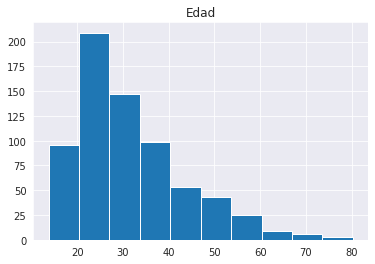

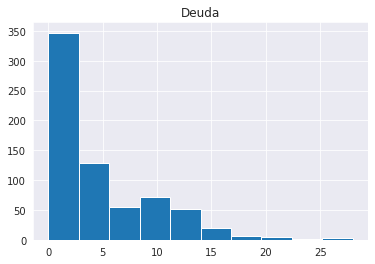

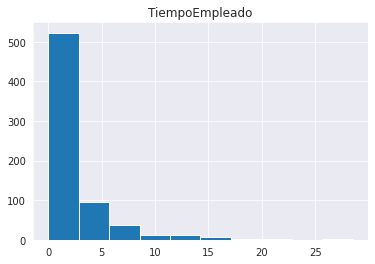

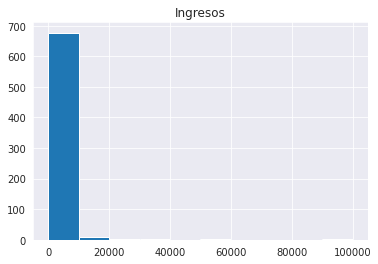

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

edad =credit_drop['Edad'].values
plt.hist(edad)
plt.title("Edad")
plt.show()

deuda =credit_drop['Deuda'].values
plt.title("Deuda")
plt.hist(deuda)
plt.show()

tiempo_empleado =credit_drop['TiempoEmpleado'].values
plt.hist(tiempo_empleado)
plt.title("TiempoEmpleado")
plt.show()

revenues =credit_drop['Ingresos'].values
plt.hist(revenues)
plt.title("Ingresos")
plt.show()

###Nuevo Modelo

In [29]:
#evaluemos la importancia de cada atributo
importancias = clf.feature_importances_ #se calcula la importancia de cada atributo

atributos = X.columns  # Extraemos los nombres de las columnas

for i in range(len(atributos)):
  print("importancia de %s = %f"%(atributos[i],importancias[i]))

importancia de Genero = 0.016248
importancia de Edad = 0.087823
importancia de Deuda = 0.092878
importancia de Casado = 0.016236
importancia de ClienteBanco = 0.015809
importancia de NivelEstudios = 0.066469
importancia de TiempoEmpleado = 0.113756
importancia de IncumplimientosPrevios = 0.309504
importancia de Empleado = 0.053541
importancia de PuntajeCredito = 0.101719
importancia de LicenciaConduccion = 0.014962
importancia de Ciudadania = 0.010720
importancia de Ingresos = 0.100335


In [32]:
atributos

Index(['Genero', 'Edad', 'Deuda', 'Casado', 'ClienteBanco', 'NivelEstudios',
       'TiempoEmpleado', 'IncumplimientosPrevios', 'Empleado',
       'PuntajeCredito', 'LicenciaConduccion', 'Ciudadania', 'Ingresos'],
      dtype='object')

In [33]:
#ordenamos los indices para obtener importancias de menor a mayor
indices = np.argsort(importancias)  
print(indices)

[11 10  4  3  0  8  5  1  2 12  9  6  7]


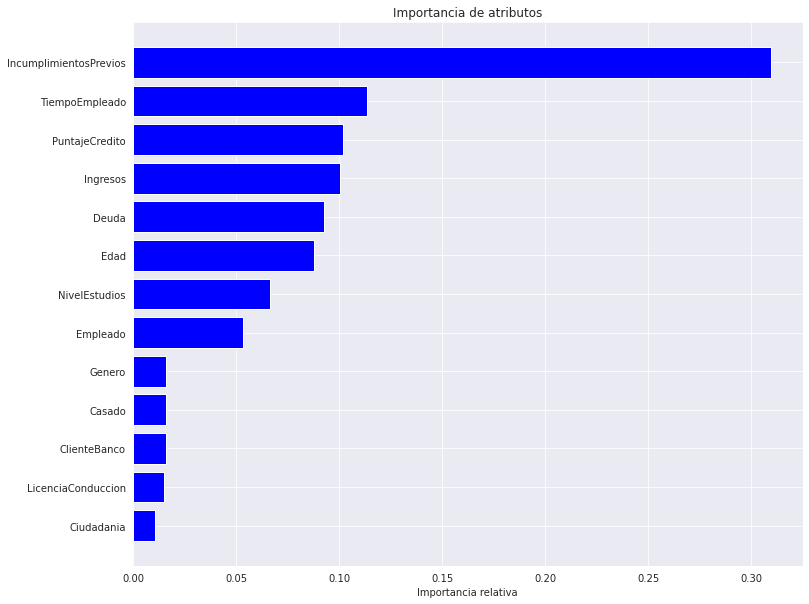

<Figure size 50400x7200 with 0 Axes>

In [35]:
#Gráfico de la importancia de variables
plt.figure(figsize=(12,10))
plt.title('Importancia de atributos')
plt.barh(range(len(indices)), importancias[indices], color='b', align='center')
plt.yticks(range(len(indices)), [atributos[i] for i in indices])
plt.xlabel('Importancia relativa')
plt.show()
plt.figure(figsize=(700,100))
plt.savefig('atributos.jpg');

In [41]:
#Selección de las 6 variables más importantes para el modelo de RandomForestClassifier
feature_df = credit_drop[['IncumplimientosPrevios', 'TiempoEmpleado', 'PuntajeCredito', 'Ingresos', 'Deuda', 'Edad' ]]
feature_df

,IncumplimientosPrevios,TiempoEmpleado,PuntajeCredito,Ingresos,Deuda,Edad
0,1,1.25,1,0,0.000,30.83
1,1,3.04,6,560,4.460,58.67
2,1,1.50,0,824,0.500,24.50
3,1,3.75,5,3,1.540,27.83
4,1,1.71,0,0,5.625,20.17
...,...,...,...,...,...,...
685,0,1.25,0,0,10.085,21.08
686,0,2.00,2,394,0.750,22.67
687,0,2.00,1,1,13.500,25.25
688,0,0.04,0,750,0.205,17.92


In [43]:
X_new = feature_df.values
y_new  =  credit_drop["Aprobado"]

In [44]:
X_new

array([[1.000e+00, 1.250e+00, 1.000e+00, 0.000e+00, 0.000e+00, 3.083e+01],
       [1.000e+00, 3.040e+00, 6.000e+00, 5.600e+02, 4.460e+00, 5.867e+01],
       [1.000e+00, 1.500e+00, 0.000e+00, 8.240e+02, 5.000e-01, 2.450e+01],
       ...,
       [0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.350e+01, 2.525e+01],
       [0.000e+00, 4.000e-02, 0.000e+00, 7.500e+02, 2.050e-01, 1.792e+01],
       [0.000e+00, 8.290e+00, 0.000e+00, 0.000e+00, 3.375e+00, 3.500e+01]])

In [45]:
y_new

0      0
1      0
2      0
3      0
4      0
      ..
685    1
686    1
687    1
688    1
689    1
Name: Aprobado, Length: 690, dtype: int64

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X_new,y_new,test_size=0.25,random_state=42)

In [47]:
#Normalizar los datos con StandardScaler
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler().fit(x_train) # esta linea extrae la media y la desviacion estandar de las columnas de x_train
x_train = scaler.transform(x_train)    # esta linea resta la media y divide por la desviacion estandar cada columna

x_test = scaler.transform(x_test)

In [48]:
#Entrenando un algoritmo de Arboles aleatorios (RandomForest)
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=700)

clf.fit(x_train,y_train) # entrenamiento

y_pred=clf.predict(x_test) # prediccion

y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [49]:
y_test.values.reshape(1,-1)

array([[1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0]])

In [50]:
#Evaluando el algoritmo con accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, y_pred) #comparamos y_test y y_pred

0.8670520231213873

In [51]:
#Evaluando el algoritmo con confusion_matrix
confusion_matrix(y_test, y_pred)

array([[69, 13],
       [10, 81]])

In [52]:
import joblib #para guardar el modelo

# salvar el modelo
joblib.dump(clf, 'modelo_arbol.joblib')

# cargar el modelo
modelo_cargado = joblib.load('modelo_arbol.joblib')

In [53]:
y_pred = modelo_cargado.predict(x_test)
print(y_pred[:5])

[1 0 1 1 1]


### Tarea de Proyecto Productivo
Tomar el modelo del punto 6 del ejercicio anterior y montarlo en una aplicacion web en Heroku.
Para eso deben basarse en las clases 10 y 11 de proyecto productivo.
Este proyecto se entrega compartiendo el enlace de la aplicacion en Heroku y la carpeta con el codigo.